In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

In [37]:
cd = pd.read_csv('Country-data.csv')

In [38]:
cd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [39]:
cd.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [40]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [41]:
sum(cd.duplicated(subset='country'))

0

In [42]:
cd.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [43]:
cd1 = pd.read_csv('data-dictionary.csv')

In [44]:
cd1

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [45]:
cd.shape

(167, 10)

In [47]:
cd.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [ ]:
#Plotting Heatmap

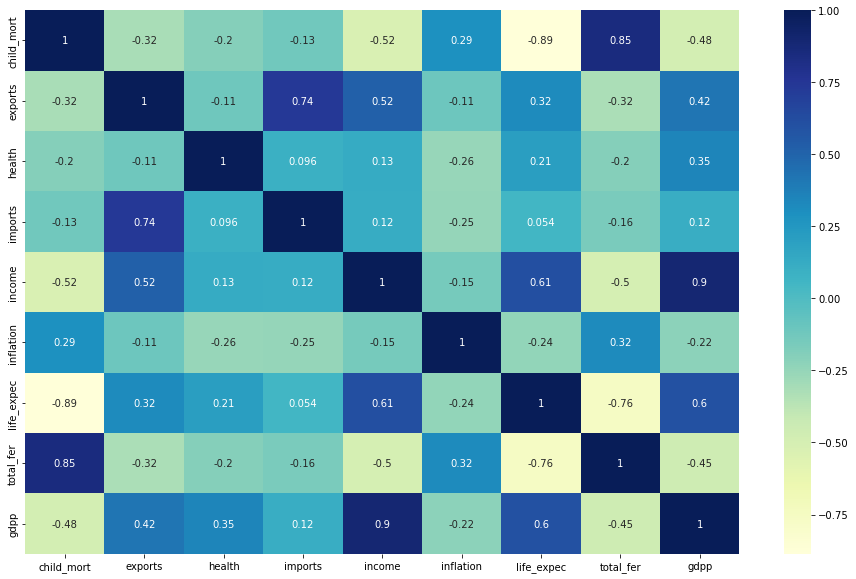

In [48]:
plt.figure(figsize = (16, 10))
sns.heatmap(cd.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

In [ ]:
#Plotting Histograms

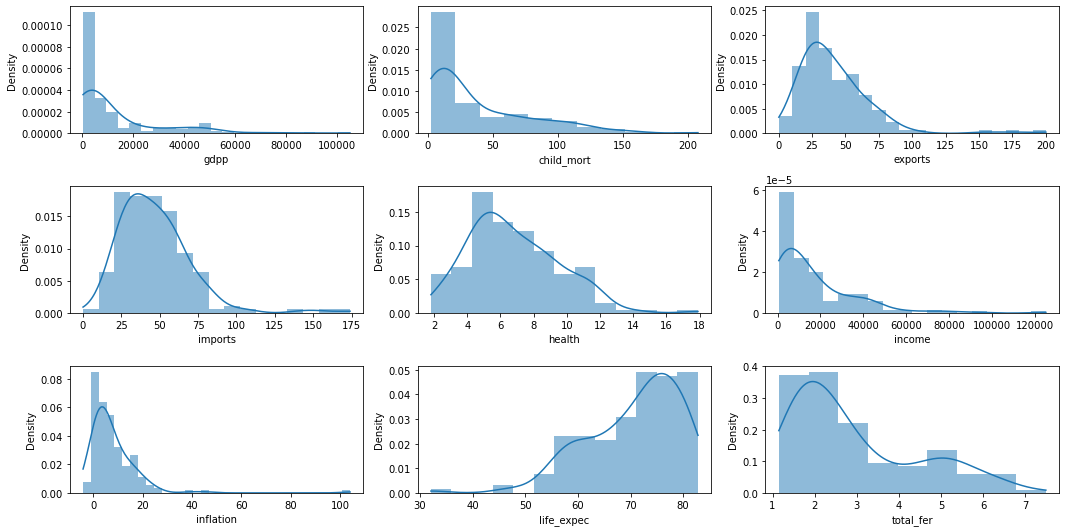

In [49]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.histplot(cd['gdpp'],stat='density',kde=True,linewidth=0,ax=axs[0,0])
plt2 = sns.histplot(cd['child_mort'],stat='density',kde=True,linewidth=0,ax=axs[0,1])
plt3 = sns.histplot(cd['exports'],stat='density',kde=True,linewidth=0,ax=axs[0,2])
plt4 = sns.histplot(cd['imports'],stat='density',kde=True,linewidth=0,ax=axs[1,0])
plt5 = sns.histplot(cd['health'],stat='density',kde=True,linewidth=0,ax=axs[1,1])
plt6 = sns.histplot(cd['income'],stat='density',kde=True,linewidth=0,ax=axs[1,2])
plt7 = sns.histplot(cd['inflation'],stat='density',kde=True,linewidth=0,ax=axs[2,0])
plt8 = sns.histplot(cd['life_expec'],stat='density',kde=True,linewidth=0,ax=axs[2,1])
plt9 = sns.histplot(cd['total_fer'],stat='density',kde=True,linewidth=0,ax=axs[2,2])
plt.tight_layout()

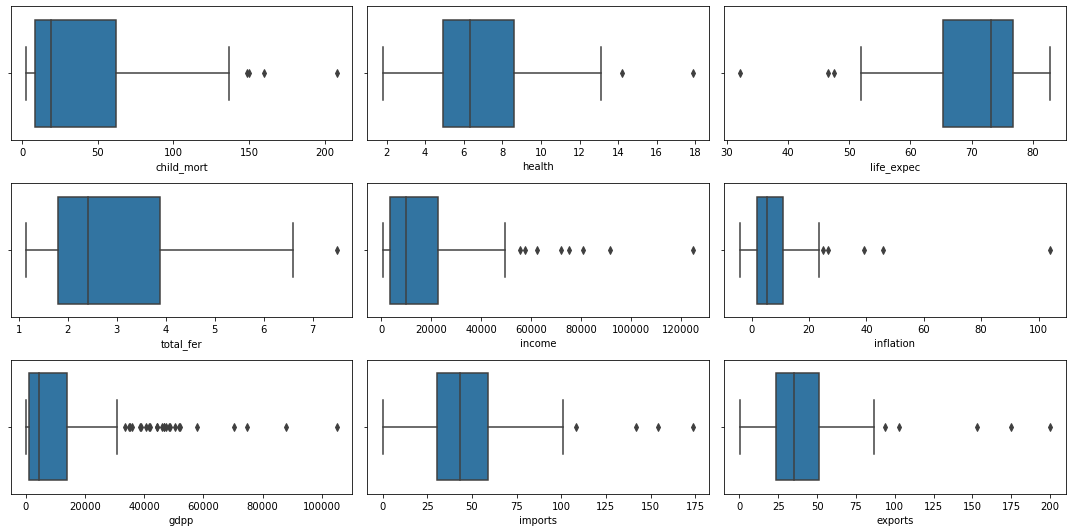

In [50]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(x=cd['child_mort'], ax=axs[0,0])
plt2 = sns.boxplot(x=cd['health'], ax=axs[0,1])
plt3 = sns.boxplot(x=cd['life_expec'], ax=axs[0,2])
plt4 = sns.boxplot(x=cd['total_fer'], ax=axs[1,0])
plt5 = sns.boxplot(x=cd['income'], ax=axs[1,1])
plt6 = sns.boxplot(x=cd['inflation'], ax=axs[1,2])
plt7 = sns.boxplot(x=cd['gdpp'], ax=axs[2,0])
plt8 = sns.boxplot(x=cd['imports'], ax=axs[2,1])
plt9 = sns.boxplot(x=cd['exports'], ax=axs[2,2])


plt.tight_layout()

#Plotting boxplots to study the distribution of the data.


In [51]:
cdd = cd.copy()
cdd.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [52]:
####Standardising data using sklearn's standard scalar.
####This standard scaler from sklearn scales values by z = x-u/s,where z=Scaled data;x= data to be scaled 
####;u=mean ;s=Standard deviation

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
list_of_variables = [
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

dff[list_of_variables] = scaler.fit_transform(dff[list_of_variables])

In [54]:
#PCA:

In [55]:
X = np.array(cdd[list_of_variables])

In [56]:
X.shape

(167, 9)

In [57]:
Y = np.array(cdd['country']).reshape(-1,1)

In [58]:
Y.shape

(167, 1)

In [59]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, sorted_eigenvectors, sorted_eigenvalue

In [60]:
X_reduced ,eigenvectors ,values = PCA(X ,5)

In [61]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances),'\n', explained_variances)

1.0 
 [0.9479230652669155, 0.05207345997116008, 1.7679466675191046e-06, 1.3868914321170922e-06, 1.9099838194772283e-07, 1.0386525577805713e-07, 1.8206094137291194e-08, 5.9891717067039945e-09, 8.649212444876847e-10]


In [62]:
np.cumsum(explained_variances)

array([0.94792307, 0.99999653, 0.99999829, 0.99999968, 0.99999987,
       0.99999997, 0.99999999, 1.        , 1.        ])

Text(0, 0.5, 'cumulative explained variance')

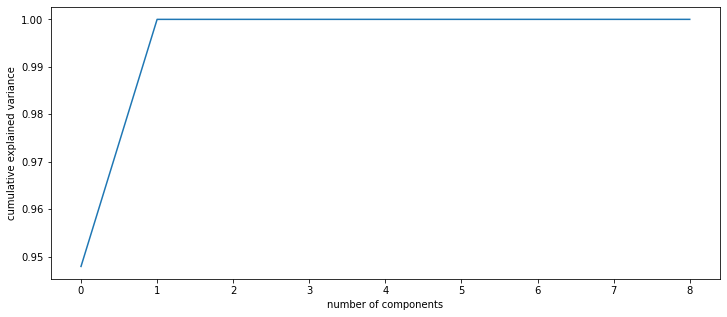

In [63]:
fig = plt.figure(figsize=(12,5))
plt.plot(np.cumsum(explained_variances))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [65]:
eigenvectors.shape

(9, 9)

In [66]:
X_reduced.shape

(167, 5)

In [67]:
#### K-means 